# Character recognition using Tensorflow and CNN

In [1]:
# Loading libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
# dataset containing
mnist = tf.keras.datasets.mnist

In [3]:
# splitting data for training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x is the image
# y is the label

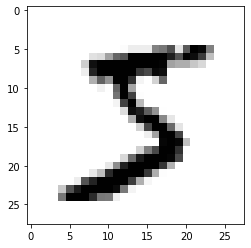

In [4]:
# display first image
plt.imshow(x_train[0], cmap= plt.cm.binary)

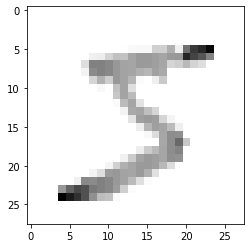

In [5]:
# normalize the data
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [6]:
# resize images to apply convolution
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## Creating CNN

In [7]:
# model
model = Sequential()

# layers
# convolution layer 1
model.add(Conv2D(64, (3, 3), input_shape= x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

# convolution layer 2
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

# convolution layer 3
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

# fully connected layer 1
model.add(Flatten()) # converts 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

# output layer
model.add(Dense(10)) # 10 because we want only 10 outputs, i.e. 0, 1,..., 9
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

## Compiling and fitting

In [9]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs= 5, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3380 - accuracy: 0.8927 - val_loss: 0.1948 - val_accuracy: 0.9423
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1054 - accuracy: 0.9676 - val_loss: 0.1069 - val_accuracy: 0.9661
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 4/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0579 - accuracy: 0.9817 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0768 - val_accuracy: 0.9774


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.9804
Loss:  0.06532646715641022
Accuracy:  0.980400025844574


In [19]:
predictions = model.predict(x_test)

0


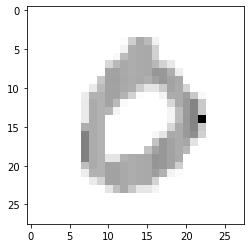

In [20]:
# checking the result
item_index = 3
plt.imshow(x_test.reshape(-1, IMG_SIZE, IMG_SIZE)[item_index], cmap= plt.cm.binary)
print(np.argmax(predictions[item_index]))